## Polynomial Linear Regression

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

warnings.simplefilter(action='ignore', category=Warning)

In [3]:
dataset = pd.read_csv('data/doggy-illness.csv', delimiter="\t")

dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


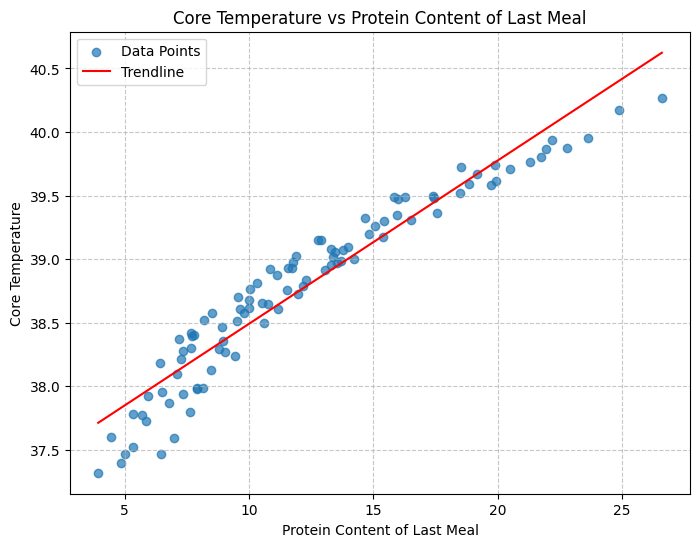

In [5]:
simple_formula = "core_temperature ~ protein_content_of_last_meal"
simple_model = smf.ols(formula=simple_formula, data=dataset).fit()

plt.figure(figsize=(8,6))
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'], alpha=0.7, label='Data Points')
x = np.linspace(dataset['protein_content_of_last_meal'].min(), dataset['protein_content_of_last_meal'].max(), 100)
y = simple_model.params[1] * x + simple_model.params[0]
plt.plot(x, y, color = 'red', label='Trendline')

plt.title("Core Temperature vs Protein Content of Last Meal")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
print('R-squared: ', simple_model.rsquared)

R-squared:  0.9155158150005704


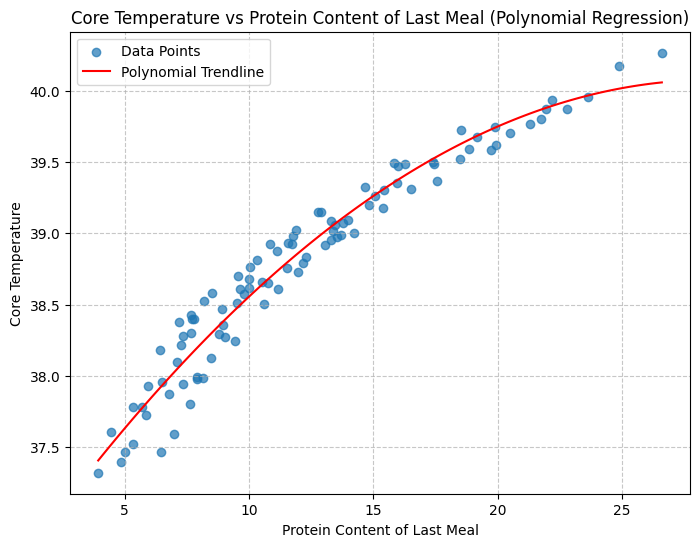

In [8]:
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

plt.figure(figsize=(8,6))

plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'], alpha=0.7, label='Data Points')

x = np.linspace(dataset['protein_content_of_last_meal'].min(), dataset['protein_content_of_last_meal'].max(), 100)
y = (polynomial_model.params[2] * x**2 +
     polynomial_model.params[1] * x +
     polynomial_model.params[0])
plt.plot(x, y, color='red', label='Polynomial Trendline')

plt.title("Core Temperature vs Protein Content of Last Meal (Polynomial Regression)")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
print("R-squared: ", polynomial_model.rsquared)

R-squared:  0.9514426069911689


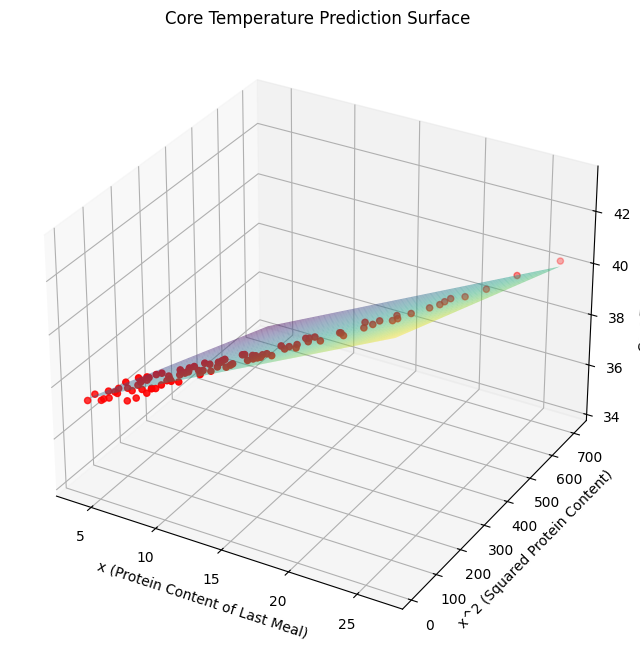

In [10]:
x_values = np.linspace(dataset.protein_content_of_last_meal.min(), dataset.protein_content_of_last_meal.max(), 50)
y_values = x_values**2 
X, Y = np.meshgrid(x_values, y_values) 
Z = polynomial_model.params[0] + (polynomial_model.params[1] * X) + (polynomial_model.params[2] * Y)  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none', label="Polynomial Surface")

ax.scatter(dataset.protein_content_of_last_meal,
           dataset.protein_content_of_last_meal**2,
           dataset.core_temperature,
           color='r', label='Data Points')

ax.set_title("Core Temperature Prediction Surface")
ax.set_xlabel("x (Protein Content of Last Meal)")
ax.set_ylabel("x^2 (Squared Protein Content)")
ax.set_zlabel("Core Temperature")

plt.show()

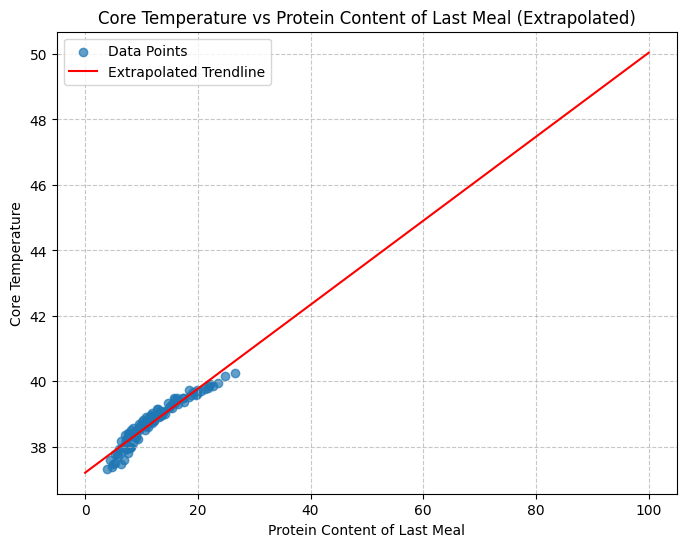

In [11]:
# Scatter plot and extrapolated trendline
plt.figure(figsize=(8, 6))

plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], alpha=0.7, label='Data Points')

x_extrapolated = np.linspace(0, 100, 100)  
y_extrapolated = simple_model.params[1] * x_extrapolated + simple_model.params[0]  
plt.plot(x_extrapolated, y_extrapolated, color='red', label='Extrapolated Trendline')

plt.title("Core Temperature vs Protein Content of Last Meal (Extrapolated)")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

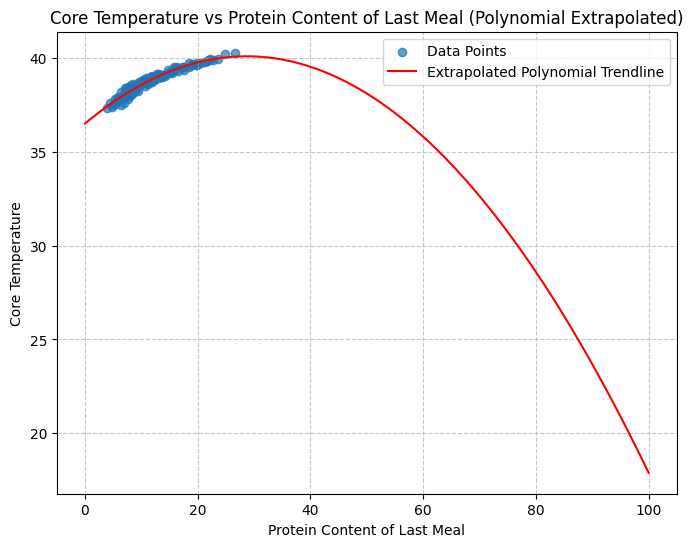

In [12]:
# Scatter plot and extrapolated polynomial trendline
plt.figure(figsize=(8, 6))

plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], alpha=0.7, label='Data Points')

x_extrapolated = np.linspace(0, 100, 100) 
y_extrapolated = (
    polynomial_model.params[2] * x_extrapolated**2 + 
    polynomial_model.params[1] * x_extrapolated + 
    polynomial_model.params[0]
)  # Polinomsal denklem: y = ax^2 + bx + c
plt.plot(x_extrapolated, y_extrapolated, color='red', label='Extrapolated Polynomial Trendline')

plt.title("Core Temperature vs Protein Content of Last Meal (Polynomial Extrapolated)")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()